In [1]:
import sys
print("Lab Setup Complete!")
print(sys.version)

Lab Setup Complete!
3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


In [2]:
import builtins
print(len(dir(builtins)))

156


In [3]:
!pip install pandas

In [4]:
import pandas as pd

# Creating a test dictionary
data = {
    'Product': ['Laptop', 'Mouse', 'Monitor'],
    'Price': [1200, 25, 300]
}

# Converting the dictionary into a DataFrame
df = pd.DataFrame(data)

df

Pandas is ready


,Product,Price
0,Laptop,1200
1,Mouse,25
2,Monitor,300


In [7]:
df = pd.read_csv('master_sales.csv')
df.head()

,OrderID,CustomerID,OrderDate,CustomerName,City,ProductName,Category,Cost,Quantity,UnitPrice,TotalRevenue
0,6955,551,2023-09-07,Yemi Adebayo,Abuja,SmartPhone X,Smartphones,600.0,3,999.0,2997.0
1,6109,1081,2023-06-23,Sipho Botha,Johannesburg,Wireless Earbuds,Accessories,40.0,2,120.0,240.0
2,2790,269,2023-08-25,Abena Owusu,Accra,BudgetBook Air,Laptops,400.0,2,600.0,1200.0
3,3748,1156,2023-12-09,Yemi Adebayo,Abuja,GamerX Extreme,Laptops,1800.0,2,2500.0,5000.0
4,1616,554,2023-06-22,Dennis Cheruiyot,Mombasa,Droid Max,Smartphones,500.0,1,850.0,850.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12031 entries, 0 to 12030
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       12031 non-null  int64  
 1   CustomerID    12031 non-null  int64  
 2   OrderDate     12031 non-null  object 
 3   CustomerName  12031 non-null  object 
 4   City          12031 non-null  object 
 5   ProductName   12031 non-null  object 
 6   Category      12031 non-null  object 
 7   Cost          12031 non-null  float64
 8   Quantity      12031 non-null  int64  
 9   UnitPrice     12031 non-null  float64
 10  TotalRevenue  12031 non-null  float64
 11  SalesTier     12031 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.1+ MB


In [9]:
print(df.shape[0])

12031


In [11]:
# To select a single column (returns a "Series")
revenue_col = df['TotalRevenue']

# To select multiple columns (returns a "DataFrame")
subset = df[['CustomerName', 'City', 'TotalRevenue']]
subset.head()

,CustomerName,City,TotalRevenue
0,Yemi Adebayo,Abuja,2997.0
1,Sipho Botha,Johannesburg,240.0
2,Abena Owusu,Accra,1200.0
3,Yemi Adebayo,Abuja,5000.0
4,Dennis Cheruiyot,Mombasa,850.0


In [13]:
# The SQL equivalent of: WHERE City = 'Dubai'
dubai_sales = df[df['City'] == 'Dubai']

# The SQL equivalent of: WHERE Revenue > 1000
high_value = df[df['TotalRevenue'] > 1000]

high_value.head()

,OrderID,CustomerID,OrderDate,CustomerName,City,ProductName,Category,Cost,Quantity,UnitPrice,TotalRevenue
0,6955,551,2023-09-07,Yemi Adebayo,Abuja,SmartPhone X,Smartphones,600.0,3,999.0,2997.0
2,2790,269,2023-08-25,Abena Owusu,Accra,BudgetBook Air,Laptops,400.0,2,600.0,1200.0
3,3748,1156,2023-12-09,Yemi Adebayo,Abuja,GamerX Extreme,Laptops,1800.0,2,2500.0,5000.0
5,2105,510,2023-12-03,Sipho Nkosi,Johannesburg,BudgetBook Air,Laptops,400.0,3,600.0,1800.0
7,1501,48,2023-08-11,Ngozi Mohammed,Abuja,GamerX Extreme,Laptops,1800.0,3,2500.0,7500.0


In [17]:
# Find Dubai sales that are also High Value
target_data = df[(df['City'] == 'Dubai') & (df['TotalRevenue'] > 1000)]
target_data

,OrderID,CustomerID,OrderDate,CustomerName,City,ProductName,Category,Cost,Quantity,UnitPrice,TotalRevenue
21,6794,708,2024-02-16,Michael Erickson,Dubai,Droid Max,Smartphones,500.0,2,850.0,1700.0
43,3094,421,2023-11-19,Casey Sherman,Dubai,SmartPhone X,Smartphones,600.0,3,999.0,2997.0
54,3756,974,2023-05-28,Jennifer Smith,Dubai,TechPro Laptop 15,Laptops,1000.0,2,1500.0,3000.0
90,6161,572,2023-11-03,Nathaniel Howell,Dubai,SmartPhone Mini,Smartphones,400.0,3,699.0,2097.0
113,4384,272,2023-09-29,Hunter Alexander,Dubai,SmartPhone X,Smartphones,600.0,2,999.0,1998.0
...,...,...,...,...,...,...,...,...,...,...,...
11925,3893,856,2024-04-10,John Reynolds,Dubai,GamerX Extreme,Laptops,1800.0,1,2500.0,2500.0
11936,6610,898,2024-07-05,James Hughes,Dubai,SmartPhone X,Smartphones,600.0,2,999.0,1998.0
11988,5182,824,2023-05-21,Heather Whitehead,Dubai,SmartPhone Mini,Smartphones,400.0,3,699.0,2097.0
12007,4289,74,2023-07-14,Roy Hardy,Dubai,BudgetBook Air,Laptops,400.0,3,600.0,1800.0


In [18]:
# 1. Check for missing values in every column
print("Missing Values")
print(df.isnull().sum())

# 2. Check for duplicate rows
print("\nDuplicate Rows")
print(df.duplicated().sum())

# 3. Check for negative quantities (should be 0 if data is clean!)
negatives = df[df['Quantity'] < 0]
print(f"\nNegative Quantity Records: {len(negatives)}")

Missing Values
OrderID         0
CustomerID      0
OrderDate       0
CustomerName    0
City            0
ProductName     0
Category        0
Cost            0
Quantity        0
UnitPrice       0
TotalRevenue    0
dtype: int64

Duplicate Rows
0

Negative Quantity Records: 0


In [19]:
# Define a logic: > 500 is Enterprise, else Small
df['SalesTier'] = df['TotalRevenue'].apply(lambda x: 'Enterprise' if x > 500 else 'Small')

# View the new column
df[['CustomerName', 'TotalRevenue', 'SalesTier']].head()

,CustomerName,TotalRevenue,SalesTier
0,Yemi Adebayo,2997.0,Enterprise
1,Sipho Botha,240.0,Small
2,Abena Owusu,1200.0,Enterprise
3,Yemi Adebayo,5000.0,Enterprise
4,Dennis Cheruiyot,850.0,Enterprise


In [20]:
# Count how many sales fall into each tier
print(df['SalesTier'].value_counts())

Enterprise    9523
Small         2508
Name: SalesTier, dtype: int64


In [22]:
# The SQL equivalent: SELECT City, SUM(Revenue) FROM sales GROUP BY City
city_performance = df.groupby('City')['TotalRevenue'].sum()

print(city_performance)

City
ABUJA             79834.0
ACCRA             16292.0
Abuja           2268677.5
Accra           2185542.5
DUBAI            156728.0
Dubai           1703342.0
JOHANNESBURG      39855.0
Johannesburg    2006586.0
KISUMU            47548.0
Kisumu          1924747.5
LAGOS             19436.0
LONDON           179161.0
Lagos           1810870.5
London          1874901.5
MOMBASA          104027.0
Mombasa         1864816.0
NAIROBI           28664.0
NEW YORK          95847.0
Nairobi         2416749.0
New York        1995056.5
abuja             77524.0
accra            132226.0
dubai             16567.0
johannesburg      66112.0
kisumu            89332.5
lagos             18897.0
london            30798.0
mombasa          100937.0
nairobi           64275.0
Name: TotalRevenue, dtype: float64


In [23]:
# Transform the City column to Title Case
df['City'] = df['City'].str.title()

# Now let's try the grouping again
city_performance = df.groupby('City')['TotalRevenue'].sum()

print(city_performance)

City
Abuja           2426035.5
Accra           2334060.5
Dubai           1876637.0
Johannesburg    2112553.0
Kisumu          2061628.0
Lagos           1849203.5
London          2084860.5
Mombasa         2069780.0
Nairobi         2509688.0
New York        2090903.5
Name: TotalRevenue, dtype: float64


In [25]:
# Remove leading and trailing spaces
df['City'] = df['City'].str.strip()

# Pro Tip: You can combine these into one line!
df['City'] = df['City'].str.title().str.strip()

df

,OrderID,CustomerID,OrderDate,CustomerName,City,ProductName,Category,Cost,Quantity,UnitPrice,TotalRevenue,SalesTier
0,6955,551,2023-09-07,Yemi Adebayo,Abuja,SmartPhone X,Smartphones,600.0,3,999.0,2997.0,Enterprise
1,6109,1081,2023-06-23,Sipho Botha,Johannesburg,Wireless Earbuds,Accessories,40.0,2,120.0,240.0,Small
2,2790,269,2023-08-25,Abena Owusu,Accra,BudgetBook Air,Laptops,400.0,2,600.0,1200.0,Enterprise
3,3748,1156,2023-12-09,Yemi Adebayo,Abuja,GamerX Extreme,Laptops,1800.0,2,2500.0,5000.0,Enterprise
4,1616,554,2023-06-22,Dennis Cheruiyot,Mombasa,Droid Max,Smartphones,500.0,1,850.0,850.0,Enterprise
...,...,...,...,...,...,...,...,...,...,...,...,...
12026,2304,428,2023-11-16,Samuel Molina,New York,BudgetBook Air,Laptops,400.0,3,600.0,1800.0,Enterprise
12027,6674,51,2023-06-25,Chinedu Obi,Lagos,NoiseCancel Headphones,Accessories,100.0,2,250.0,500.0,Small
12028,6742,1147,2023-05-02,Ngozi Adeyemi,Lagos,NoiseCancel Headphones,Accessories,100.0,2,250.0,500.0,Small
12029,6636,285,2023-04-18,Mercy Cheruiyot,Mombasa,GamerX Extreme,Laptops,1800.0,2,1250.0,2500.0,Enterprise


In [26]:
# This should now return '10' to match your SQL Distinct count
print(df['City'].nunique())

10


In [27]:
# Getting multiple metrics for each Category
category_stats = df.groupby('Category')['TotalRevenue'].agg(['sum', 'mean', 'count'])
# Renaming columns for clarity
category_stats.columns = ['Total Revenue', 'Average Sale', 'Number of Orders']
category_stats

,Total Revenue,Average Sale,Number of Orders
Category,,,
Accessories,1772610.0,475.230563,3730
Laptops,13853900.0,2855.885384,4851
Smartphones,5788839.5,1677.924493,3450


In [29]:
final_report = category_stats.reset_index()
final_report

,Category,Total Revenue,Average Sale,Number of Orders
0,Accessories,1772610.0,475.230563,3730
1,Laptops,13853900.0,2855.885384,4851
2,Smartphones,5788839.5,1677.924493,3450


In [30]:
# Group by Category and find the MEAN (Average) Quantity per order
avg_qty = df.groupby('Category')['Quantity'].mean()
print(avg_qty)

Category
Accessories    1.987131
Laptops        1.996289
Smartphones    1.992174
Name: Quantity, dtype: float64


In [31]:
# The SQL equivalent: SELECT City, SUM(Revenue) FROM sales GROUP BY City
city_performance = df.groupby('City')['TotalRevenue'].sum()

print(city_performance)

City
Abuja           2426035.5
Accra           2334060.5
Dubai           1876637.0
Johannesburg    2112553.0
Kisumu          2061628.0
Lagos           1849203.5
London          2084860.5
Mombasa         2069780.0
Nairobi         2509688.0
New York        2090903.5
Name: TotalRevenue, dtype: float64


In [32]:
# Creating the Pivot Table
# fill_value=0 ensures that if a city didn't sell a category, it shows 0 instead of 'NaN'
pivot_report = df.pivot_table(index='City', 
                              columns='Category', 
                              values='TotalRevenue', 
                              aggfunc='sum',
                              fill_value=0)

pivot_report

Category,Accessories,Laptops,Smartphones
City,,,
Abuja,213105,1541800,671130.5
Accra,193660,1529800,610600.5
Dubai,154360,1190700,531577.0
Johannesburg,171025,1420400,521128.0
Kisumu,155900,1292350,613378.0
Lagos,164315,1157150,527738.5
London,196805,1254150,633905.5
Mombasa,168680,1389650,511450.0
Nairobi,192530,1675750,641408.0


In [33]:
pivot_with_totals = df.pivot_table(index='City', 
                                   columns='Category', 
                                   values='TotalRevenue', 
                                   aggfunc='sum', 
                                   fill_value=0, 
                                   margins=True)

pivot_with_totals

Category,Accessories,Laptops,Smartphones,All
City,,,,
Abuja,213105,1541800,671130.5,2426035.5
Accra,193660,1529800,610600.5,2334060.5
Dubai,154360,1190700,531577.0,1876637.0
Johannesburg,171025,1420400,521128.0,2112553.0
Kisumu,155900,1292350,613378.0,2061628.0
Lagos,164315,1157150,527738.5,1849203.5
London,196805,1254150,633905.5,2084860.5
Mombasa,168680,1389650,511450.0,2069780.0
Nairobi,192530,1675750,641408.0,2509688.0


In [34]:
# Sorting by the Grand Total column
sorted_report = pivot_with_totals.sort_values(by='All', ascending=False)
sorted_report

Category,Accessories,Laptops,Smartphones,All
City,,,,
All,1772610,13853900,5788839.5,21415349.5
Nairobi,192530,1675750,641408.0,2509688.0
Abuja,213105,1541800,671130.5,2426035.5
Accra,193660,1529800,610600.5,2334060.5
Johannesburg,171025,1420400,521128.0,2112553.0
New York,162230,1402150,526523.5,2090903.5
London,196805,1254150,633905.5,2084860.5
Mombasa,168680,1389650,511450.0,2069780.0
Kisumu,155900,1292350,613378.0,2061628.0


In [35]:
# Install libraries
!pip install matplotlib seaborn

# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Tell Jupyter to show the charts directly in the notebook
%matplotlib inline

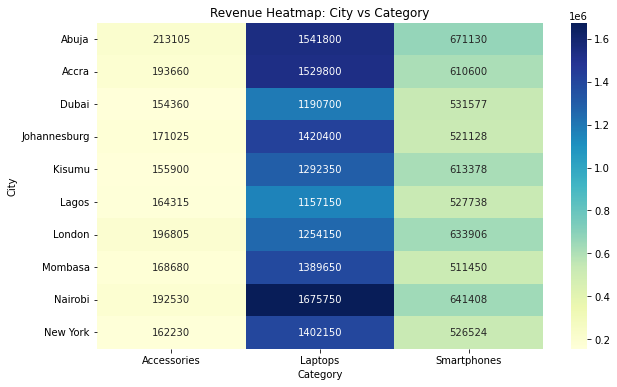

In [36]:
# Prepare the data (excluding the 'All' totals)
clean_pivot = pivot_report.drop('All', axis=0, errors='ignore').drop('All', axis=1, errors='ignore')

# Create the Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(clean_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Revenue Heatmap: City vs Category')
plt.show()

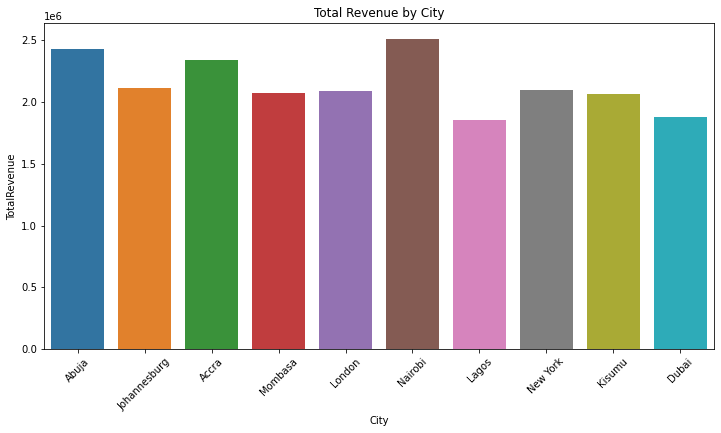

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='City', y='TotalRevenue', estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.title('Total Revenue by City')
plt.show()

In [39]:
# Convert OrderDate column to proper datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Check the data types - 'OrderDate' should now be 'datetime64[ns]'
print(df.dtypes)

OrderID                  int64
CustomerID               int64
OrderDate       datetime64[ns]
CustomerName            object
City                    object
ProductName             object
Category                object
Cost                   float64
Quantity                 int64
UnitPrice              float64
TotalRevenue           float64
SalesTier               object
dtype: object


In [43]:
# 1. We must set the Date as the Index for resampling to work
df_time = df.set_index('OrderDate')

# 2. 'M' stands for Month-end. We find the sum of revenue for each month.
monthly_revenue = df_time['TotalRevenue'].resample('M').sum()

print(monthly_revenue.sample(5))

OrderDate
2024-11-30     870134.5
2024-10-31    1049022.0
2024-05-31     711732.5
2024-08-31     997164.0
2023-01-31     913912.5
Name: TotalRevenue, dtype: float64


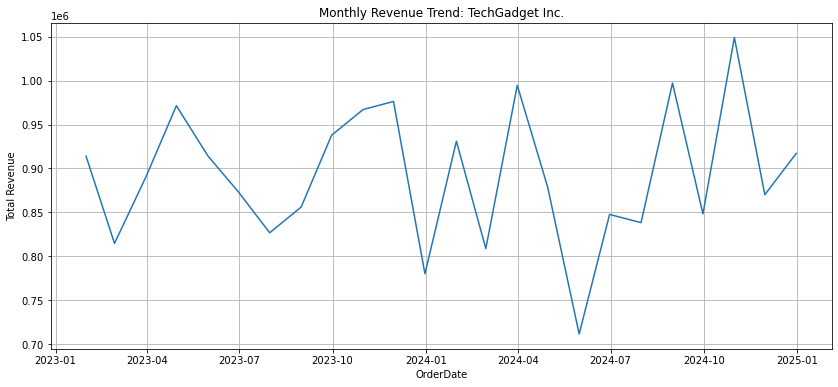

In [44]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_revenue)
plt.title('Monthly Revenue Trend: TechGadget Inc.')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

In [45]:
# Find the month with the highest revenue
highest_month = monthly_revenue.idxmax()
highest_value = monthly_revenue.max()

print(f"Top Month: {highest_month}")
print(f"Top Revenue: {highest_value}")

Top Month: 2024-10-31 00:00:00
Top Revenue: 1049022.0


In [46]:
def run_full_analysis(file_name):
    # 1. Load
    df = pd.read_csv(file_name)
    
    # 2. Clean
    df['City'] = df['City'].str.title().str.strip()
    df['OrderDate'] = pd.to_datetime(df['OrderDate'])
    
    # 3. Analyze (Top 5 Cities by Revenue)
    report = df.groupby('City')['TotalRevenue'].sum().sort_values(ascending=False).head(5)
    
    return report

# Execution
final_output = run_full_analysis('master_sales.csv')
print(final_output)

City
Nairobi         2509688.0
Abuja           2426035.5
Accra           2334060.5
Johannesburg    2112553.0
New York        2090903.5
Name: TotalRevenue, dtype: float64


Report Saved Successfully.


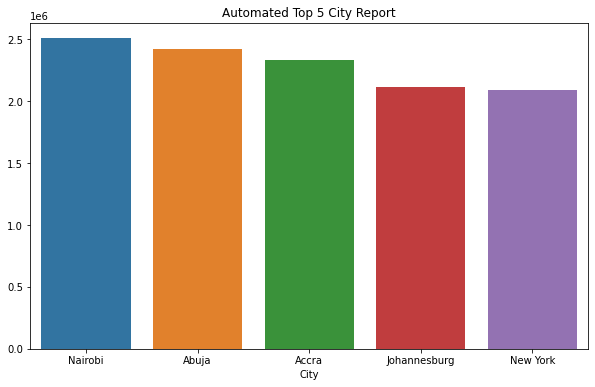

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x=final_output.index, y=final_output.values)
plt.title('Automated Top 5 City Report')

# This line saves the chart to your folder
plt.savefig('executive_summary_chart.png') 
print("Report Saved Successfully.")

In [48]:
!pip install pyodbc

In [49]:
import pyodbc
import pandas as pd

# Define your connection details
conn_str = (
    "Driver={SQL Server};"
    "Server=localhost;"
    "Database=TechGadget_Inc;"
    "Trusted_Connection=yes;"
)

# Establish the tunnel
connection = pyodbc.connect(conn_str)
print("Connection Successful!")

Connection Successful!


In [50]:
query = "SELECT * FROM v_MasterSalesSummary"

# Read the data through the tunnel
df_direct = pd.read_sql(query, connection)

# Always close the connection when done to save memory
connection.close()

df_direct.head()

C:\Users\Wekesa\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,OrderID,CustomerID,OrderDate,CustomerName,City,ProductName,Category,Cost,Quantity,UnitPrice,TotalRevenue
0,6955,551,2023-09-07,Yemi Adebayo,Abuja,SmartPhone X,Smartphones,600.0,3,999.0,2997.0
1,6109,1081,2023-06-23,Sipho Botha,Johannesburg,Wireless Earbuds,Accessories,40.0,2,120.0,240.0
2,2790,269,2023-08-25,Abena Owusu,Accra,BudgetBook Air,Laptops,400.0,2,600.0,1200.0
3,3748,1156,2023-12-09,Yemi Adebayo,Abuja,GamerX Extreme,Laptops,1800.0,2,2500.0,5000.0
4,1616,554,2023-06-22,Dennis Cheruiyot,Mombasa,Droid Max,Smartphones,500.0,1,850.0,850.0


In [51]:
# 1. Install the wrapper (Run this once)
!pip install sqlalchemy

In [52]:
# 2. Update your code
from sqlalchemy import create_engine
import urllib

# Our existing connection string
conn_str = (
    "Driver={SQL Server};"
    "Server=localhost;"
    "Database=TechGadget_Inc;"
    "Trusted_Connection=yes;"
)

# This part "packages" the string for SQLAlchemy
params = urllib.parse.quote_plus(conn_str)
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

# 3. Now use the 'engine' instead of 'connection'
df_direct = pd.read_sql("SELECT * FROM v_MasterSalesSummary", engine)

In [53]:
df_direct

,OrderID,CustomerID,OrderDate,CustomerName,City,ProductName,Category,Cost,Quantity,UnitPrice,TotalRevenue
0,6955,551,2023-09-07,Yemi Adebayo,Abuja,SmartPhone X,Smartphones,600.0,3,999.0,2997.0
1,6109,1081,2023-06-23,Sipho Botha,Johannesburg,Wireless Earbuds,Accessories,40.0,2,120.0,240.0
2,2790,269,2023-08-25,Abena Owusu,Accra,BudgetBook Air,Laptops,400.0,2,600.0,1200.0
3,3748,1156,2023-12-09,Yemi Adebayo,Abuja,GamerX Extreme,Laptops,1800.0,2,2500.0,5000.0
4,1616,554,2023-06-22,Dennis Cheruiyot,Mombasa,Droid Max,Smartphones,500.0,1,850.0,850.0
...,...,...,...,...,...,...,...,...,...,...,...
12026,2304,428,2023-11-16,Samuel Molina,New York,BudgetBook Air,Laptops,400.0,3,600.0,1800.0
12027,6674,51,2023-06-25,Chinedu Obi,Lagos,NoiseCancel Headphones,Accessories,100.0,2,250.0,500.0
12028,6742,1147,2023-05-02,Ngozi Adeyemi,Lagos,NoiseCancel Headphones,Accessories,100.0,2,250.0,500.0
12029,6636,285,2023-04-18,Mercy Cheruiyot,Mombasa,GamerX Extreme,Laptops,1800.0,2,1250.0,2500.0


In [54]:
# Count the number of columns in your direct SQL pull
print(len(df_direct.columns))

11


In [55]:
# We use the 'engine' we created with SQLAlchemy
# name: What you want the new table to be called in SQL
# if_exists: 'replace' will overwrite the table if it already exists
df.to_sql(name='TechGadget_Enhanced_Sales', con=engine, if_exists='replace', index=False)

print("Data successfully pushed to SQL Server!")

Data successfully pushed to SQL Server!


In [56]:
def calculate_commission(row):
    # Ingredient 1: The Revenue
    rev = row['TotalRevenue']
    # Ingredient 2: The City
    city = row['City']
    
    # The Logic
    if city == 'Nairobi' and rev > 1000:
        return rev * 0.15  # 15% Bonus for high-value Nairobi sales
    elif city == 'Lagos':
        return rev * 0.12  # 12% Standard for Lagos
    else:
        return rev * 0.05  # 5% for everyone else

In [57]:
# axis=1 tells Python to look at the 'Rows'
df['Commission'] = df.apply(calculate_commission, axis=1)

# Verify the new column
df[['City', 'TotalRevenue', 'Commission']].head()

,City,TotalRevenue,Commission
0,Abuja,2997.0,149.85
1,Johannesburg,240.0,12.00
2,Accra,1200.0,60.00
3,Abuja,5000.0,250.00
4,Mombasa,850.0,42.50


In [58]:
total_payout = df['Commission'].sum()
print(round(total_payout, 2))

1421032.17


In [59]:
def safe_division(row):
    try:
        return row['TotalRevenue'] / row['Quantity']
    except ZeroDivisionError:
        # If there is a zero, return 0 instead of crashing
        return 0
    except Exception as e:
        # This catches any other random error and tells you what it is
        print(f"An unexpected error occurred: {e}")
        return None

In [60]:
def clean_numeric(value):
    try:
        return float(value)
    except ValueError:
        # If the value can't be a number (like the word 'Missing'), return 0
        return 0.0

# Applying it to a column to ensure it's strictly numeric
df['TotalRevenue'] = df['TotalRevenue'].apply(clean_numeric)

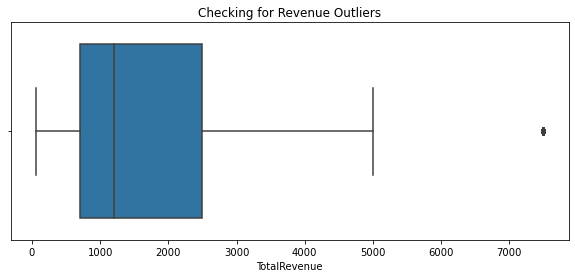

7      7500.0
51     7500.0
59     7500.0
65     7500.0
157    7500.0
Name: TotalRevenue, dtype: float64


In [61]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['TotalRevenue'])
plt.title('Checking for Revenue Outliers')
plt.show()
# To see the exact numbers of the top 5 highest sales
print(df['TotalRevenue'].nlargest(5))

In [66]:
# Calculating Profit: Revenue - (Cost * Quantity)
# Note: Ensure your column names match your CSV/SQL view
df['Profit'] = df['TotalRevenue'] - (df['Cost'] * df['Quantity'])

print("Profit Column Created!")
df[['TotalRevenue', 'Cost', 'Quantity', 'Profit']].head()

Profit Column Created!


,TotalRevenue,Cost,Quantity,Profit
0,2997.0,600.0,3,1197.0
1,240.0,40.0,2,160.0
2,1200.0,400.0,2,400.0
3,5000.0,1800.0,2,1400.0
4,850.0,500.0,1,350.0


In [67]:
corr_value = df['Quantity'].corr(df['Profit'])
print(round(corr_value, 2))

0.53


In [68]:
rev_std = df['TotalRevenue'].std()
rev_mean = df['TotalRevenue'].mean()

print(f"Average Revenue: {round(rev_mean, 2)}")
print(f"Standard Deviation: {round(rev_std, 2)}")

Average Revenue: 1780.01
Standard Deviation: 1621.89


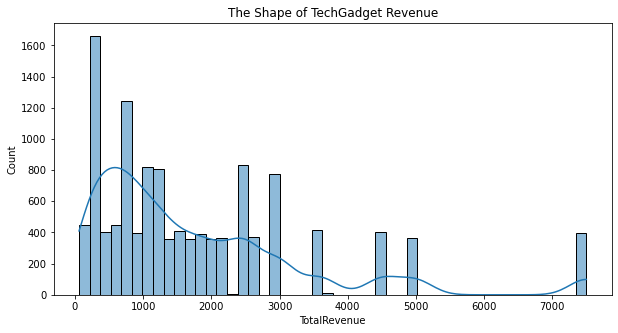

In [69]:
# Visualizing the 'Shape' of your Revenue
plt.figure(figsize=(10, 5))
sns.histplot(df['TotalRevenue'], kde=True) # kde=True adds the "wave" line
plt.title('The Shape of TechGadget Revenue')
plt.show()

In [70]:
profit_std = df['Profit'].std()
profit_mean = df['Profit'].mean()
cv = profit_std / profit_mean

print(f"Profit Volatility (CV): {round(cv, 2)}")

Profit Volatility (CV): 0.78


In [71]:
from matplotlib.backends.backend_pdf import PdfPages

# Create the PDF object
pdf_report = PdfPages('TechGadget_Executive_Report.pdf')

In [72]:
# --- Page 1: Revenue Trend ---
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_revenue)
plt.title('Monthly Revenue Performance')
pdf_report.savefig() # Saves Page 1
plt.close() # Closes the chart to save memory

# --- Page 2: Profit Distribution (The Burger Method) ---
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Profit'], color='green')
plt.title('Profit Integrity & Outlier Audit')
pdf_report.savefig() # Saves Page 2
plt.close()

# --- Page 3: City Performance ---
plt.figure(figsize=(10, 6))
sns.barplot(x=city_performance.index, y=city_performance.values)
plt.title('Total Sales by Region')
plt.xticks(rotation=45)
pdf_report.savefig() # Saves Page 3
plt.close()

In [73]:
pdf_report.close()
print("Executive PDF Report Generated!")

Executive PDF Report Generated!


In [75]:
capstone = pd.read_csv('TechGadget_Sales_Raw.csv')
capstone

,OrderDate,City,Category,TotalRevenue,ProductCost,Quantity,Discount
0,2026-01-01,NAIROBI,Electronics,1200.0,400,2,0.05
1,2026-01-02,London,Accessories,150.0,30,5,0.00
2,2026-01-03,LAGOS,Electronics,2500.0,800,1,0.10
3,2026-01-04,nairobi,Furniture,450.0,200,1,0.00
4,2026-01-05,Abuja,Accessories,NaN,25,4,0.00
...,...,...,...,...,...,...,...
94,2026-04-06,Abuja,Accessories,180.0,50,4,0.00
95,2026-04-07,JOHANNESBURG,Electronics,1600.0,600,3,0.05
96,2026-04-08,New York,Furniture,4800.0,1900,2,0.15
97,2026-04-09,dubai,Electronics,25000.0,600,1,0.00


In [77]:
# 1. Check for Missing Values
print(capstone.isnull().sum())

OrderDate       0
City            0
Category        0
TotalRevenue    3
ProductCost     0
Quantity        0
Discount        0
dtype: int64


In [78]:
# 2. Check for Duplicate Rows
print(capstone.duplicated().sum())

0


In [79]:
# 3. Check for Case-Sensitivity
print(capstone['City'].unique())

['NAIROBI' 'London' 'LAGOS' 'nairobi' 'Abuja' 'JOHANNESBURG' 'New York'
 'dubai' 'KISUMU' 'Nairobi' 'lagos' 'ACCRA' 'LONDON' 'MOMBASA' 'Dubai'
 'Lagos' 'abuja' 'Kisumu' 'johannesburg' 'Accra' 'Mombasa']


In [80]:
# 4. Check for Negative Values in Revenue or Quantity
print(capstone.describe())

       TotalRevenue  ProductCost   Quantity   Discount
count     96.000000    99.000000  99.000000  99.000000
mean    2644.791667   620.707071   2.383838   0.038384
std     4038.060759   545.750751   1.404854   0.045078
min       50.000000    15.000000   1.000000   0.000000
25%      375.000000    75.000000   1.000000   0.000000
50%     1400.000000   500.000000   2.000000   0.000000
75%     3200.000000  1100.000000   3.000000   0.050000
max    25000.000000  1900.000000   6.000000   0.150000


In [81]:
capstone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderDate     99 non-null     object 
 1   City          99 non-null     object 
 2   Category      99 non-null     object 
 3   TotalRevenue  96 non-null     float64
 4   ProductCost   99 non-null     int64  
 5   Quantity      99 non-null     int64  
 6   Discount      99 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.5+ KB


In [82]:
# Converting columns to numeric, forcing errors to NaN (Not a Number)
capstone['TotalRevenue'] = pd.to_numeric(capstone['TotalRevenue'], errors='coerce')

# Filling the missing revenue with the Median (to avoid outlier influence)
capstone['TotalRevenue'] = capstone['TotalRevenue'].fillna(capstone['TotalRevenue'].median())

In [84]:
capstone['City'] = capstone['City'].str.title().str.strip()

In [85]:
# Engineering the Profit Column
capstone['Profit'] = capstone['TotalRevenue'] - (capstone['ProductCost'] * capstone['Quantity'])